# Data Analysis Results of the WeRateDogs Twitter Account

## Introduction

WeRateDogs is a Twitter account that rates people's dogs, along with a comment about the dog, based on the pictures posted to the account.  Data from the WeRateDogs Twitter account was gathered from the twitter API and a csv file containing data was also provided.  Furthermore, a tweet image predictions file was programmatically downloaded from the Udacity server, which contained the predicted breed of dog (or other object, animal, etc.) present in each tweet's image, according to a neural network. Following assessment and cleaning, the data was analysed to gain insights into the WeRateDogs twitter account. 

## Loading DataFrames

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [23]:
# Read twitter_archive_master data 
engine1 = create_engine('sqlite:///twitter_master_db.db')
twitter_archive_master = pd.read_sql('SELECT * FROM twitter_master', engine1)
# Read twitter_archive_master data 
engine2 = create_engine('sqlite:///image_predictions_clean_db.db')
image_predictions_clean = pd.read_sql('SELECT * FROM image_predict_db', engine2)
# Read 'dog_favourite_mean' 
dog_favorite_mean = pd.read_csv('dog_favorite_mean.csv')

## Analysis

### Retweets vs. Favourites

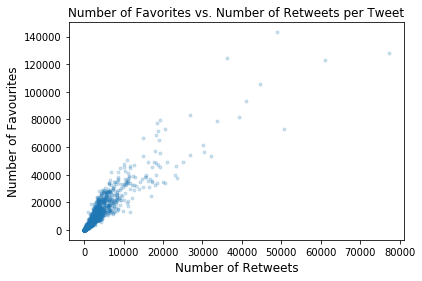

In [24]:
_ = plt.plot(twitter_archive_master['retweets'], twitter_archive_master['favorites'], marker='.', linestyle = 'none', 
            alpha = 0.2)

plt.xlabel('Number of Retweets', size = 12)
plt.ylabel('Number of Favourites', size = 12)
plt.title('Number of Favorites vs. Number of Retweets per Tweet')

plt.show()

The scatter plot of number of favourites versus number of retweets, for each tweet shows that the two variables are have a stronng linear relationship, with a correlation coefficient of 0.92 computed.  As the number of favorites increases, so does the number of retweets.  However, the mean number of favorites and retweets is 8613 and 2711, respectively, which shows that more people click 'favorite' for a tweet they like more than retweet it. 

### 2) Dog Stage vs. Favorites & Rating

#### Dog Stage vs. Favorites

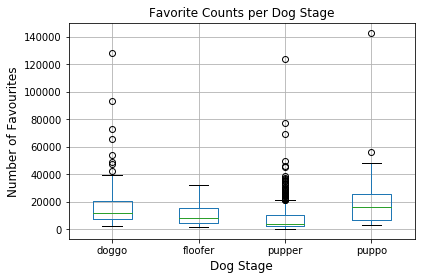

In [25]:
twitter_archive_master.boxplot(column = 'favorites', by = 'dog_stage')

plt.xlabel('Dog Stage', size = 12)
plt.ylabel('Number of Favourites', size = 12)
plt.title('Favorite Counts per Dog Stage', size = 12)
plt.suptitle("")

plt.show()

The boxplot of the number of favorites per dog stage indicates that, on average, tweets about puppo's receive the most favorites, and pupper's receive the least favorites. 

## 3) Image Predictions

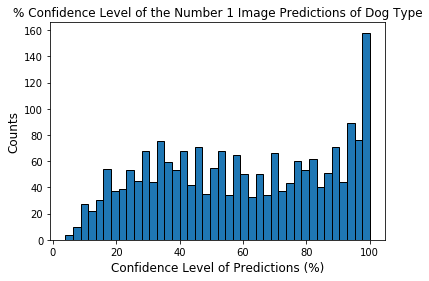

In [26]:
ip1 = plt.hist(image_predictions_clean['prediction_1_confidence(%)'], bins=40, edgecolor="k")

plt.xlabel('Confidence Level of Predictions (%)', size = 12)
plt.ylabel('Counts', size = 12)
plt.title('% Confidence Level of the Number 1 Image Predictions of Dog Type', size=12)

plt.show()

The histogram shows the counts for the confidence levels of the algorithm's number one prediction of the type of dog in the pictures.  The % confidence predictions ranged from as low as 4 %, to as high as 100 %, with an average confidence prediction of 58 %.  It was determined that some of these images are not images of dogs.  When such images were removed from the data, the average % confidence in predicting dog types only increased slightly to 61 %.  Therefore, further research is required to improve on the algorithm's prediciton capabilities of dog types.

### 4) Dog Type vs. Average Favorite Counts

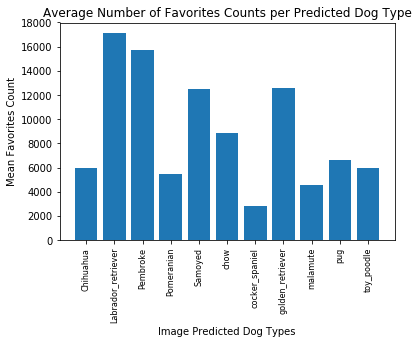

In [27]:
_ = plt.bar(dog_favorite_mean['prediction_1'], dog_favorite_mean['favorites'], align='center')

plt.xticks(rotation=90, size = 8)
plt.xlabel('Image Predicted Dog Types')
plt.ylabel('Mean Favorites Count')
plt.title('Average Number of Favorites Counts per Predicted Dog Type')


plt.show()

This bar plot displays the averge number of favourites for the most common dog types (predicted from the images 30 times or more).  This plot shows that labrador-retrievers, closely followed by pembrokes, recieved the most favorite counts, on average (17,122 and 15,734 respectively).   The average favorites count was much lower for the cocker-spaniels, at 2,841.